In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
import duck_db_helper
import os

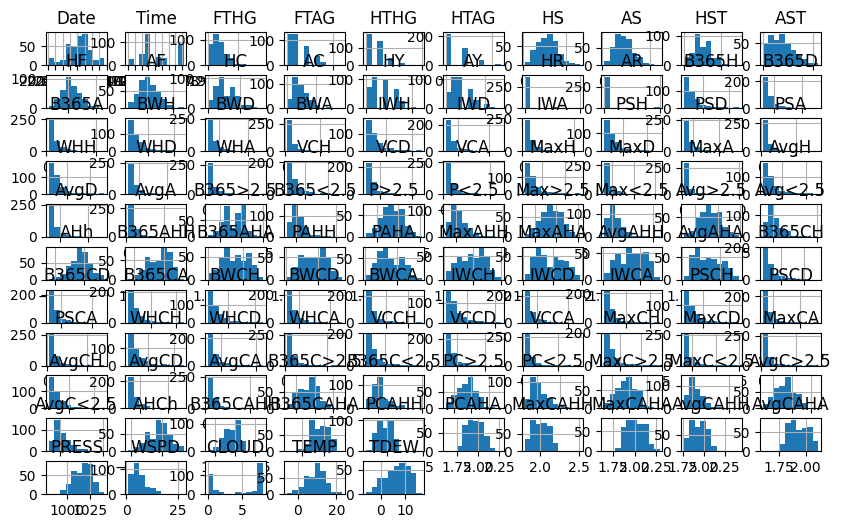

In [8]:
# Descriptive analysis
zone = 'exploitation_zone'
path = os.path.join('..', 'data', zone)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
conn = duckdb.connect(os.path.join(path, zone+".db"))
tables = duck_db_helper.get_tables(conn)
with open(os.path.join(path, 'descriptive_analysis.txt'), mode='w') as f:
    for table_name in tables: 
        f.write(table_name+"\n\n")
        df = conn.sql(f"SELECT * FROM \"{table_name}\";").df()
        f.write(str(df.describe(include='all', datetime_is_numeric=True)))
        f.write('\n')
        f.write(str(df.isna().sum()))
        f.write('\n')
        df.hist(figsize=(10,6))
        plt.savefig(os.path.join(path, 'img', f'{table_name}_profile.png'))
        break
conn.close()
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

In [23]:
df.loc[df.isna().sum(axis=1) > 0]


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,B365>2.5,B365<2.5,...,MaxAHA,AvgAHH,AvgAHA,B365CH,B365CD,B365CA,BWCH,BWCD,BWCA,IWCH,IWCD,IWCA,PSCH,PSCD,PSCA,WHCH,WHCD,WHCA,VCCH,VCCD,VCCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,B365C>2.5,B365C<2.5,PC>2.5,PC<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,PRESS,WDIR,WSPD,CLOUD,TEMP,TDEW
176,E0,2023-12-01,2023-10-27 20:00:00,Fulham,Chelsea,2,1,H,1,0,H,D Coote,8,20,3,10,12,16,5,7,4,3,0,1,3.30,3.50,2.15,3.30,3.50,2.15,3.25,3.45,2.20,3.43,3.60,2.21,3.20,3.40,2.20,3.30,3.40,2.10,3.52,3.74,2.23,3.36,3.54,2.18,1.87,2.03,...,1.91,2.00,1.87,3.80,3.50,1.95,4.00,3.30,2.00,3.90,3.35,2.00,4.07,3.48,2.04,4.00,3.4,1.95,3.90,3.20,2.00,4.35,3.50,2.11,4.00,3.41,2.02,2.20,1.67,2.30,1.68,2.31,1.76,2.23,1.68,0.50,1.88,2.05,1.88,2.04,1.90,2.11,1.86,2.02,NaN,None,NaN,NaN,NaN,NaN
210,E0,2023-11-02,2023-10-27 12:30:00,West Ham,Chelsea,1,1,D,1,1,D,C Pawson,10,12,2,4,9,11,5,6,1,1,0,0,3.30,3.30,2.25,3.30,3.20,2.25,3.35,3.20,2.25,3.43,3.37,2.30,3.30,3.20,2.25,3.40,3.10,2.20,3.51,3.41,2.33,3.40,3.29,2.27,2.20,1.67,...,1.99,1.93,1.94,3.40,3.30,2.20,3.30,3.25,2.20,3.35,3.15,2.25,3.51,3.38,2.27,3.50,3.2,2.15,3.40,3.20,2.15,3.85,3.45,2.30,3.46,3.32,2.23,2.10,1.73,2.15,1.77,2.27,1.81,2.15,1.72,0.25,2.01,1.92,1.98,1.93,2.10,1.96,1.98,1.90,NaN,None,NaN,NaN,NaN,NaN
211,E0,2023-11-02,2023-10-27 15:00:00,Arsenal,Brentford,1,1,D,0,0,D,P Bankes,23,9,7,2,9,9,7,4,0,2,0,0,1.44,4.75,7.00,1.43,4.50,7.50,1.45,4.60,7.00,1.47,4.77,7.32,1.42,4.50,7.50,1.40,4.50,7.50,1.49,4.90,8.00,1.45,4.72,7.52,1.73,2.10,...,1.95,1.97,1.91,1.50,4.33,6.50,1.51,4.20,6.50,1.50,4.40,6.50,1.58,4.25,6.35,1.50,4.2,6.50,1.45,4.10,7.00,1.58,4.50,7.00,1.54,4.27,6.59,1.73,2.10,1.88,2.03,1.90,2.15,1.81,2.04,-1.00,1.84,2.09,1.91,2.01,1.91,2.09,1.86,2.02,NaN,None,NaN,NaN,NaN,NaN
212,E0,2023-11-02,2023-10-27 15:00:00,Crystal Palace,Brighton,1,1,D,0,0,D,M Oliver,6,17,1,7,10,11,1,6,4,1,0,0,3.80,3.50,2.00,3.60,3.40,2.05,3.75,3.45,2.05,3.90,3.56,2.06,3.70,3.40,2.00,3.80,3.30,2.00,3.97,3.64,2.08,3.81,3.51,2.04,2.00,1.80,...,2.08,1.85,2.04,4.75,3.75,1.75,4.60,3.60,1.78,4.70,3.60,1.77,5.15,3.79,1.76,4.50,3.5,1.80,4.80,3.50,1.73,5.15,3.82,1.87,4.78,3.70,1.79,2.10,1.73,2.15,1.78,2.24,1.89,2.10,1.77,0.75,1.89,2.04,1.92,2.01,1.92,2.09,1.86,2.03,NaN,None,NaN,NaN,NaN,NaN
213,E0,2023-11-02,2023-10-27 15:00:00,Fulham,Nott'm Forest,2,0,H,1,0,H,A Madley,16,10,3,1,9,11,5,4,0,1,0,0,1.91,3.50,4.33,1.88,3.50,4.10,1.90,3.50,4.20,1.94,3.57,4.37,1.91,3.50,4.00,1.85,3.40,4.20,1.98,3.70,4.50,1.93,3.56,4.22,2.10,1.73,...,2.03,1.91,1.96,1.91,3.50,4.33,1.95,3.40,4.00,1.95,3.45,4.10,1.97,3.52,4.33,1.91,3.4,4.20,1.90,3.30,4.10,2.00,3.61,4.50,1.94,3.51,4.24,2.08,1.82,2.10,1.81,2.13,1.85,2.06,1.80,-0.50,1.95,1.98,1.97,1.95,2.00,2.00,1.94,1.94,NaN,None,NaN,NaN,NaN,NaN
214,E0,2023-11-02,2023-10-27 15:00:00,Leicester,Spurs,4,1,H,3,1,H,M Salisbury,15,11,7,4,14,9,1,5,5,2,0,0,3.40,3.60,2.10,3.30,3.60,2.10,3.35,3.50,2.15,3.46,3.70,2.16,3.30,3.60,2.10,3.30,3.50,2.10,3.52,3.84,2.18,3.39,3.64,2.13,1.73,2.10,...,1.88,2.03,1.85,3.50,3.75,2.00,3.40,3.60,2.05,3.40,3.60,2.10,3.57,3.76,2.10,3.50,3.6,2.00,3.40,3.60,2.00,3.80,3.85,2.13,3.51,3.71,2.07,1.73,2.10,1.74,2.20,1.77,2.28,1.72,2.17,0.50,1.85,2.08,1.84,2.10,1.86,2.16,1.82,2.07,NaN,None,NaN,NaN,NaN,NaN
215,E0,2023-11-02,2023-10-27 15:00:00,Southampton,Wolves,1,2,A,1,0,H,J Gillett,17,11,2,2,12,14,5,2,2,2,0,1,2.90,3.20,2.55,2.87,3.10,2.55,2.90,3.15,2.55,3.16,3.18,2.55,3.00,3.10,2.50,2.90,3.10,2.50,3.20,3.30,2.60,3.03,3.18,2.54,2.30,1.62,...,1.83,2.12,1.78,3.00,3.20,2.50,3.10,3.10,2.40,3.05,3.15,2.45,3.26,3.18,2.50,3.00,3.1,2.50,3.10,3.10,2.38,3.30,3.25,2.58,3.13,3.16,2.47,2.30,1.62,2.40,1.63,2.47,1.67,2.31,1.63,0.25,1.83,2.10,1.83,2.11,1.86,2.23,1.81,2.09,NaN,None,NaN,NaN,NaN,NaN
216,E0,2023-11-02,2023-10-27 17:30:00,Bournemouth,Newcastl

In [21]:
df.iloc[0,:].isna().any()

False